In [1]:
import pandas as pd
pd.set_option("display.precision", 7)
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import figure
import yfinance as yf
from dateutil import parser
from statistics import mean, pstdev
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,5)
import warnings
warnings.filterwarnings('ignore')
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt

Why Ln()? <br>
1. Stock return is always assumed to follow a Log Normal Distribution
2. Investments are in million, returns in small percents, for comparing to balance it out
3. In quantitative finance is assumed that the evolution of asset prices follows a "geometric brownian motion" <BR>
    So to get normal value we have to use Ln <BR>
    LN( e^x ) = x

In [2]:
def plot_box_cox(col):
    fitted_data, fitted_lambda = stats.boxcox(col)
    
    fig, ax = plt.subplots(1, 2)
    sns.distplot(col, hist = False, kde = True,
               kde_kws = {'shade': True, 'linewidth': 2}, 
                label = "Non-Normal", color ="green", ax = ax[0])

    sns.distplot(fitted_data, hist = False, kde = True,
                kde_kws = {'shade': True, 'linewidth': 2}, 
                label = "Normal", color ="green", ax = ax[1])

    # adding legends to the subplots
    plt.legend(loc = "upper right")

    # rescaling the subplots
    fig.set_figheight(5)
    fig.set_figwidth(10)

    print(f"Lambda value used for Transformation: {fitted_lambda}")
    return fitted_data

    
def plott(x, y1, y2, title):
    # create figure and axis objects with subplots()
    fig,ax = plt.subplots()
    fig.set_figheight(5)
    fig.set_figwidth(20)
    ax.plot(x, y1,color = "#1f77b4")

    ax2=ax.twinx()
    ax2.plot(x, y2,color="#ff7f0e")
    plt.title(title)
    plt.show()
    
def plot_3_graphs(x,y,z,w, title, lab1, lab2, lab3):
    host = host_subplot(111, axes_class=AA.Axes)
    plt.subplots_adjust(right=0.75)

    par1 = host.twinx()
    par2 = host.twinx()
    p1, = host.plot(range(0,len(x)), y, label = lab1)
    p2, = par1.plot(range(0,len(x)), z, label = lab2, alpha=0.5)
    p3, = par2.plot(range(0,len(x)), w, label = lab3, alpha=0.5)
    host.legend()
    
    plt.title(title)
    plt.draw()
    plt.show()

def plot_4_graphs(x,y,z,w,v, title, lab1, lab2, lab3, lab4):
    host = host_subplot(111, axes_class=AA.Axes)
    plt.subplots_adjust(right=0.75)

    par1 = host.twinx()
    par2 = host.twinx()
    par3 = host.twinx()

    p1, = host.plot(range(0,len(x)), y, label = lab1)
    p2, = par1.plot(range(0,len(x)), z,label = lab2, alpha=0.5)
    p3, = par2.plot(range(0,len(x)), w,label = lab3, alpha=0.5)
    p4, = par3.plot(range(0,len(x)), v,label = lab4, alpha=0.5)

    host.legend()

    plt.title(title)
    plt.draw()
    plt.show()
    
def bc_negative(col):
    return [i[0] for i in power_transform(np.array(col).reshape(-1,1), method='yeo-johnson')]

In [3]:
data = pd.read_csv('Binance_BTCUSDT_d.csv', skiprows = 0, sep = ";")
data = data[['date','close']]
data.date = [parser.parse(i).date() for i in data.date]
data = data.rename(columns={'date': 'Date', 'close': 'Close'})

## DATA - last 180 days

In [4]:
data = data.head(180)
data = data[::-1]
og = data.Close

## Box-Cox

https://www.statisticshowto.com/box-cox-transformation/

## Closing price

Lambda value used for Transformation: 0.24884518648618437


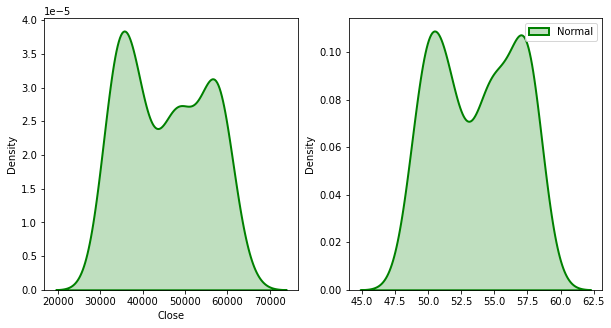

In [5]:
bc_close = plot_box_cox(og)

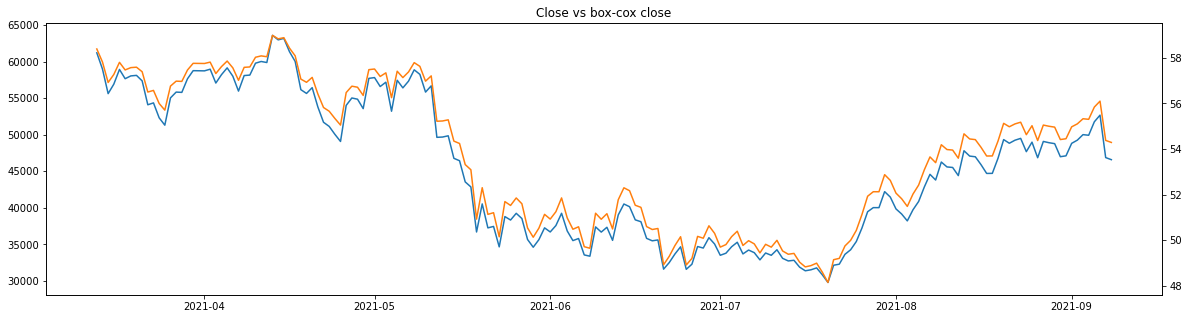

In [6]:
plott(data.Date, data.Close, bc_close, "Close vs box-cox close")

## Returns

Lambda value used for Transformation: 8.472135811722177


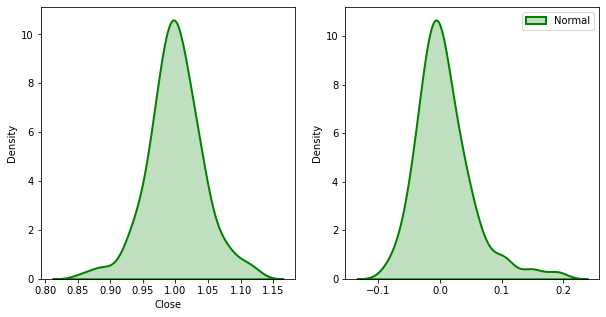

In [7]:
returns = data.Close.div(data.Close.shift()).fillna(np.nan)
bc_returns = plot_box_cox(returns)

### Close vs daily change

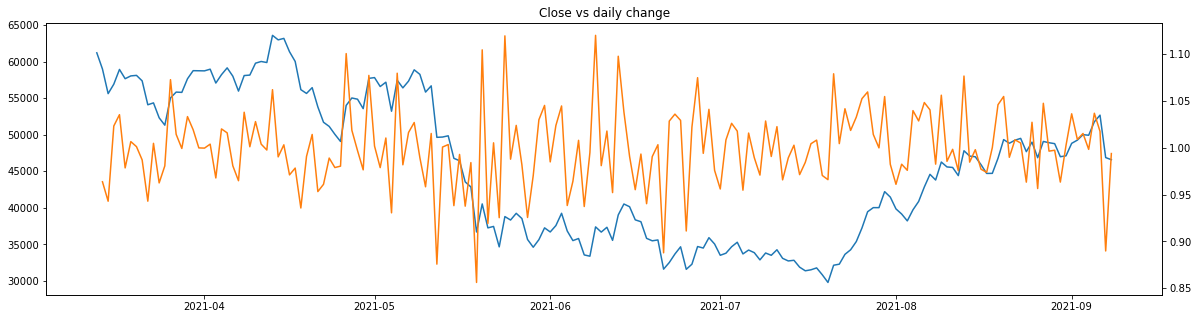

In [8]:
plott(data.Date, og, returns, "Close vs daily change")

### Daily change vs box-cox daily change

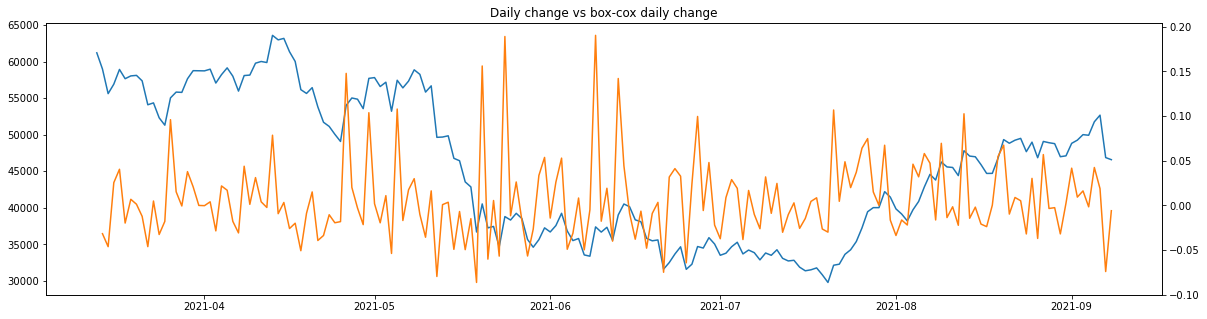

In [9]:
plott(data.Date, og, bc_returns, "Daily change vs box-cox daily change")

### Close vs daily change vs boxcox daily change

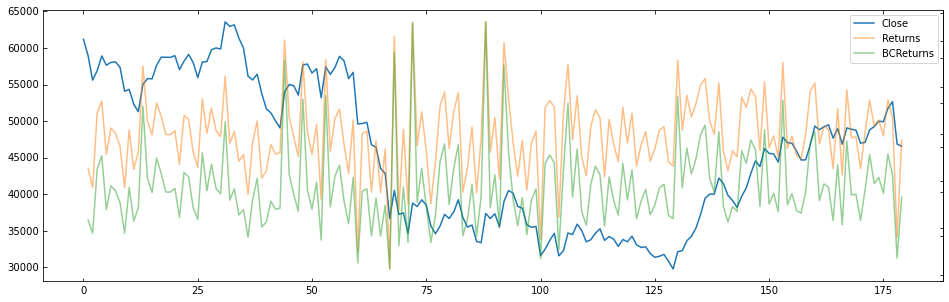

In [12]:
plot_3_graphs(data.Date, og, returns,bc_returns, "","Close","Returns","BCReturns")

## SQROOT

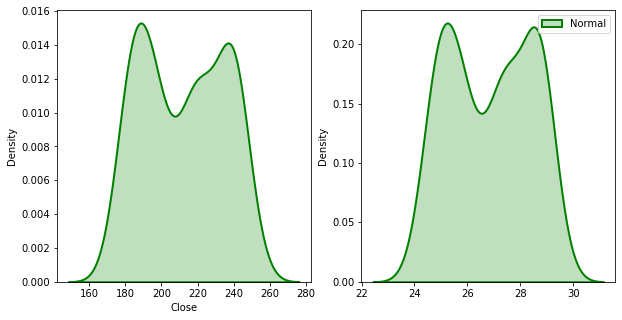

In [13]:
og = data.Close
sqroot = (og)**(1/2)
bc_sqroot = plot_box_cox(sqroot)

### Close vs sqrt(close) vs boxcox(sqrt(close))

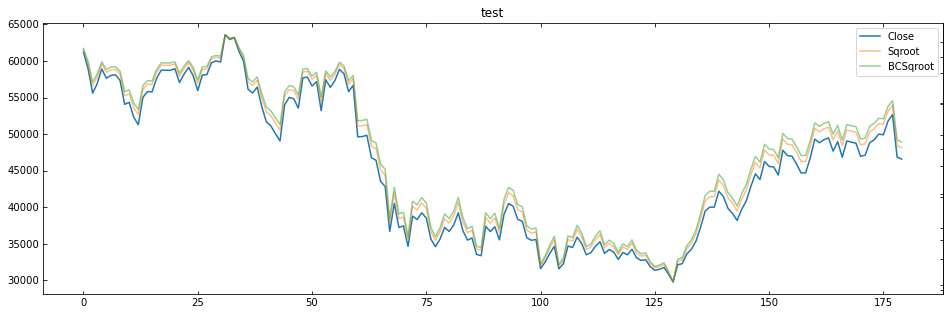

In [14]:
plot_3_graphs(data.Date, og, sqroot,bc_sqroot, "","Close","Sqroot","BCSqroot")

## LOG

Lambda value used for Transformation: 3.306641254630112


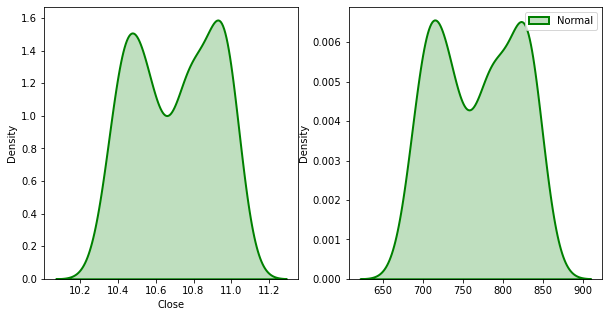

In [14]:
logclose = np.log(og)
bc_logclose = plot_box_cox(logclose)

### Close vs log(close) vs boxcox(log(close))

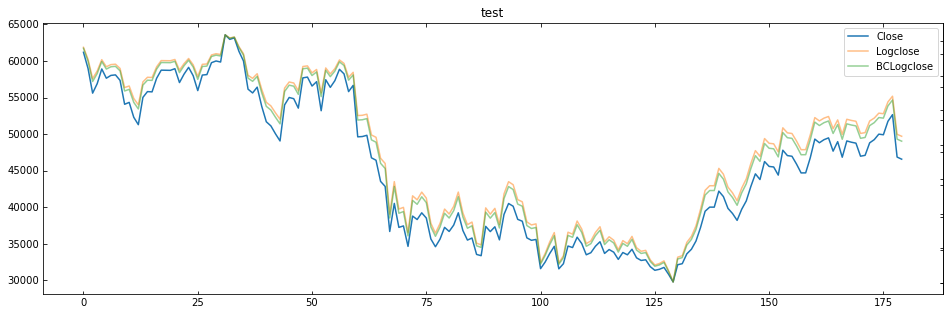

In [15]:
plot_3_graphs(data.Date, og, logclose,bc_logclose, "test","Close","Logclose","BCLogclose")

Source:<br>
    https://quant.stackexchange.com/questions/9192/how-to-normalize-stock-data

### Close-Mean of last n values

In [16]:
def close_mean(col, n):
    result = []
    res = [0] * (n)
    end = n
    while(end < len(col)):
        temp= col[end-n:end+1]
        y = col[end-1] - np.nanmean(temp)
        res.append(y)
        end+=1
 
    return res

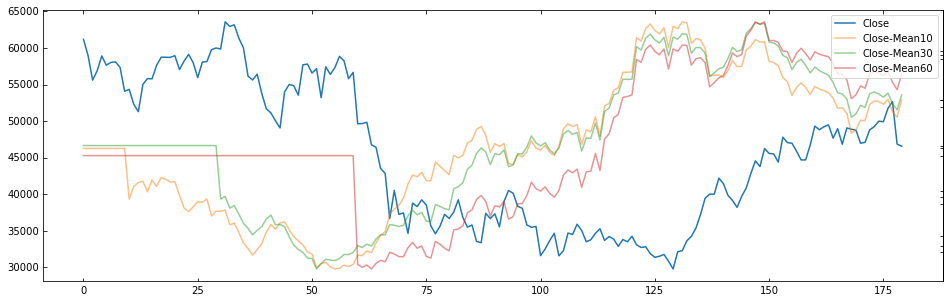

In [17]:
cmean10 = close_mean(og, 10)
cmean30 = close_mean(og, 30)
cmean60 = close_mean(og, 60)
plot_4_graphs(data.Date,og,cmean10,cmean30,cmean60, "", "Close", "Close-Mean10", "Close-Mean30", "Close-Mean60")

### Ln(Close) - Mean of last n values

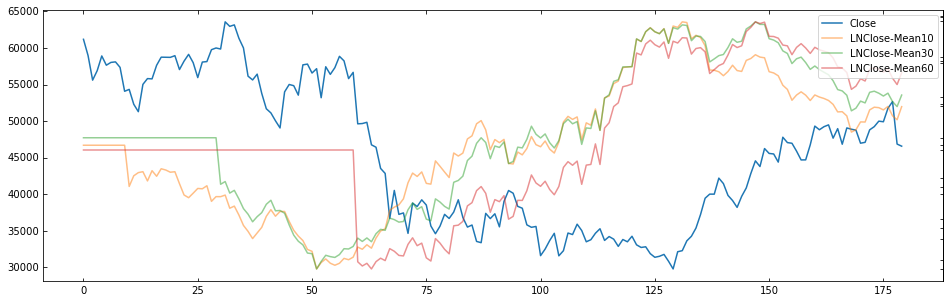

In [18]:
lncmean10 = close_mean(np.log(og), 10)
lncmean30 = close_mean(np.log(og), 30)
lncmean60 = close_mean(np.log(og), 60)
plot_4_graphs(data.Date,og,lncmean10,lncmean30,lncmean60, "", "Close", "LNClose-Mean10", "LNClose-Mean30", "LNClose-Mean60")

### Ln(Close) - Ln(Close1) : Close1 is previous close.

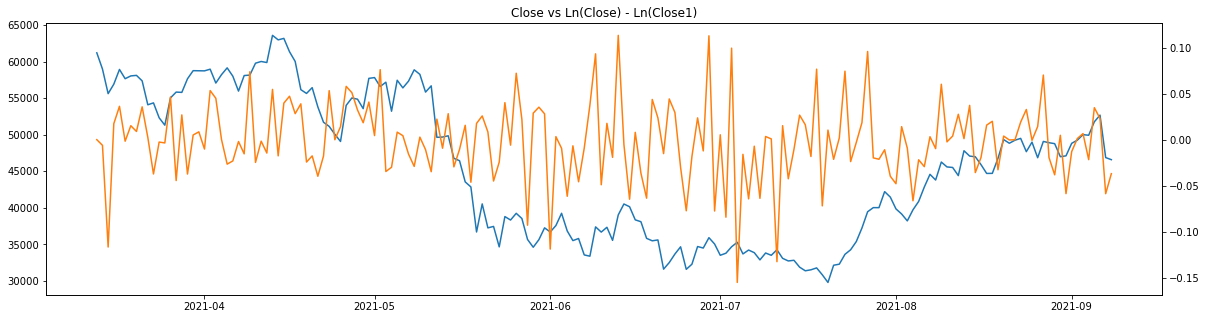

In [20]:
lnchange = [0]
for i in range(len(og)-1):
    lnchange.append(np.log(og[i]) - np.log(og[i+1]))
    
plott(data.Date, og, lnchange,"Close vs Ln(Close) - Ln(Close1)")

### (Close-Close1)*100/Close1

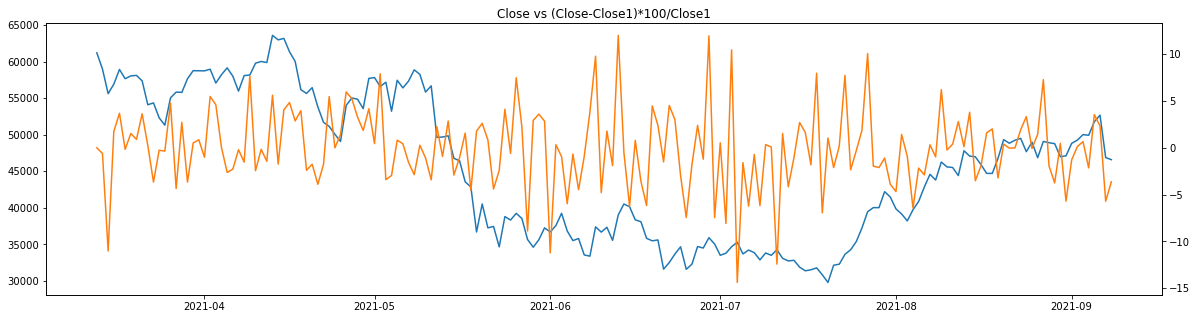

In [21]:
hundchange = [0]
for i in range(len(og)-1):
    hundchange.append(((og[i] - og[i+1])*100)/og[i+1])
    
plott(data.Date, og, hundchange,"Close vs (Close-Close1)*100/Close1")

#### Baseline point of view - observing change after some chosen baseline
#### NP = ((PR - BASE) / BASE) * 100 ; where BASE is the base price at the date specified
#### index =  90: 2021-06-10 ir 36675.72

In [24]:
def base_normalization(data, index):
    df = data.copy()
    bdate = df.loc[index-1,:][0]
    bprice = df.loc[index-1,:][1]
    print("Baseline: ",bdate, bprice)
    df = df[df.Date >= bdate]
    plott(data.Date, data.Close, list([0]*index) + list(100*((df.Close- bprice)/bprice)),"")

Baseline:  2021-06-11 37331.98


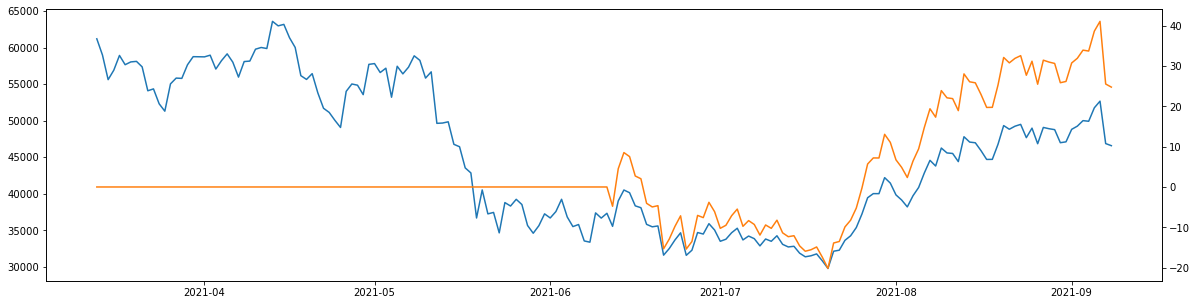

In [25]:
base_normalization(data, 90)